# Introduction 

1. [Loading and Checking Data](#1)
1. [Linear Regression](#2)
1. [Multiple Linear Regression](#3)
1. [Polynomial Linear Regression](#4)
1. [Decision Tree Regression](#5)
1. [Random Forest Regression](#6)
1. [Evaluation Regression Models](#7)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn.metrics import r2_score

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings        
# ignore filters
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.

plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.
# Any results you write to the current directory are saved as output.

/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv
/kaggle/input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv


<a id="1"></a><br>
# Loading and Checking Data

In [2]:
bfop_df1=pd.read_csv("/kaggle/input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv")

bfop_df2=pd.read_csv("/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv")

In [3]:
bfop_df1.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


In [4]:
bfop_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
bfop_df2.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [6]:
bfop_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


<a id="2"></a><br>
# Linear Regression

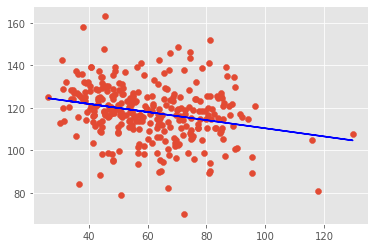

r_score: 0.06124001800718515


In [7]:
from sklearn.linear_model import LinearRegression

linear_reg=LinearRegression()

x=bfop_df1.pelvic_incidence.values.reshape(-1,1)
y=bfop_df1.pelvic_radius.values.reshape(-1,1)

linear_reg.fit(x,y)

minimum=int(min(x))
maximum=int(max(x))

#array=linear_reg.predict(x)

plt.scatter(x,y)

y_head=linear_reg.predict(x)

plt.plot(x,y_head,color="blue")
plt.show()

print("r_score:",r2_score(y,y_head))

<a id="3"></a><br>
# Multiple Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

multiple_linear_regression=LinearRegression()

x=bfop_df2.iloc[:,[0,1]].values # pelvic incidence and pelvic tilt numeric
y=bfop_df2.pelvic_radius.values.reshape(-1,1)



multiple_linear_regression.fit(x,y)

array=[]

for i in np.array(range(35,88)):
    
    print(multiple_linear_regression.predict([[i,i]]),"\n")



[[133.90386865]] 

[[133.97600021]] 

[[134.04813177]] 

[[134.12026333]] 

[[134.19239489]] 

[[134.26452645]] 

[[134.33665801]] 

[[134.40878958]] 

[[134.48092114]] 

[[134.5530527]] 

[[134.62518426]] 

[[134.69731582]] 

[[134.76944738]] 

[[134.84157894]] 

[[134.9137105]] 

[[134.98584207]] 

[[135.05797363]] 

[[135.13010519]] 

[[135.20223675]] 

[[135.27436831]] 

[[135.34649987]] 

[[135.41863143]] 

[[135.490763]] 

[[135.56289456]] 

[[135.63502612]] 

[[135.70715768]] 

[[135.77928924]] 

[[135.8514208]] 

[[135.92355236]] 

[[135.99568393]] 

[[136.06781549]] 

[[136.13994705]] 

[[136.21207861]] 

[[136.28421017]] 

[[136.35634173]] 

[[136.42847329]] 

[[136.50060486]] 

[[136.57273642]] 

[[136.64486798]] 

[[136.71699954]] 

[[136.7891311]] 

[[136.86126266]] 

[[136.93339422]] 

[[137.00552578]] 

[[137.07765735]] 

[[137.14978891]] 

[[137.22192047]] 

[[137.29405203]] 

[[137.36618359]] 

[[137.43831515]] 

[[137.51044671]] 

[[137.58257828]] 

[[137.65470984]] 


<a id="4"></a><br>
# Polynomial Linear Regression

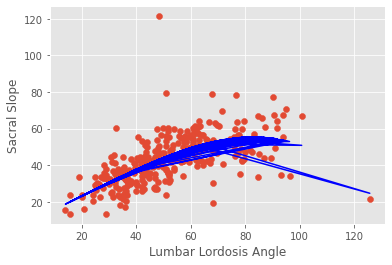

r_score: 0.4466125687249751


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression=PolynomialFeatures(degree=4)

x=bfop_df1.lumbar_lordosis_angle.values.reshape(-1,1)
y=bfop_df1.sacral_slope.values.reshape(-1,1)

x_polynomial=polynomial_regression.fit_transform(x)

linear_regression2=LinearRegression()
linear_regression2.fit(x_polynomial,y)

y_head=linear_regression2.predict(x_polynomial)

plt.scatter(x,y)
plt.xlabel("Lumbar Lordosis Angle")
plt.ylabel("Sacral Slope")
plt.plot(x,y_head,color="blue")
plt.show()

print("r_score:",r2_score(y,y_head))

<a id="5"></a><br>
# Decision Tree Regression

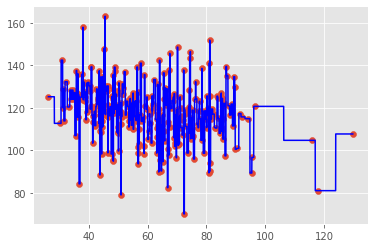

r_score: 1.0


In [10]:
from sklearn.tree import DecisionTreeRegressor

x=bfop_df2.pelvic_incidence.values.reshape(-1,1)
y=bfop_df2.pelvic_radius.values.reshape(-1,1)

tree_reg=DecisionTreeRegressor()
tree_reg.fit(x,y)

x_=np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head=tree_reg.predict(x_)
y_head2=tree_reg.predict(x)

plt.scatter(x,y)
plt.plot(x_,y_head,color="blue")
plt.show()

print("r_score:",r2_score(y,y_head2))

<a id="7"></a><br>
# Evaluation Regression Models

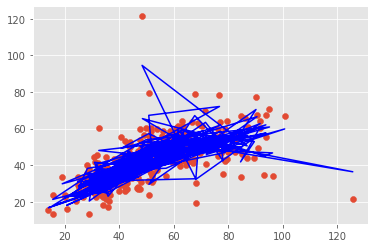

r_score: 0.8588355853887086


In [11]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100, random_state=42)

x=bfop_df2.lumbar_lordosis_angle.values.reshape(-1,1)
y=bfop_df2.sacral_slope.values.reshape(-1,1)

rf.fit(x,y)

y_head=rf.predict(x)

plt.scatter(x,y)
plt.plot(x,y_head,color="blue")
plt.show()

print("r_score:",r2_score(y,y_head))